In [1]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Paths
train_dir = r'C:\Users\ASG\Downloads\Project\Emotion train'
test_dir = r'C:\Users\ASG\Downloads\Project\Emotion test'

# Image Parameters
img_size = 48
batch_size = 64

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2, rotation_range=20)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)




Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
# Number of output classes
num_classes = len(train_generator.class_indices)

# Build CNN Model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



C:\Users\ASG\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,775 (3.42 MB)

 Trainable params: 895,879 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)



C:\Users\ASG\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 203s 441ms/step - accuracy: 0.2374 - loss: 2.0274 - val_accuracy: 0.2947 - val_loss: 1.7082
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 288s 642ms/step - accuracy: 0.3042 - loss: 1.6994 - val_accuracy: 0.3529 - val_loss: 1.6636
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 394s 878ms/step - accuracy: 0.3456 - loss: 1.6218 - val_accuracy: 0.4430 - val_loss: 1.4806
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 4813s 11s/step - accuracy: 0.3844 - loss: 1.5560 - val_accuracy: 0.4154 - val_loss: 1.5477
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 235s 522ms/step - accuracy: 0.4073 - loss: 1.5095 - val_accuracy: 0.4590 - val_loss: 1.4096
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 307s 685ms/step - accuracy: 0.4238 - loss: 1.4683 - val_accuracy: 0.5156 - val_loss: 1.3264
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 371s 827ms/step - accuracy: 0.4348 - loss: 1.4470 - val_accuracy: 0.4972 - val_loss: 1.3229
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 567s 1s/step - accuracy: 0.4463 - los

In [21]:
# Save the model
model.save('mood_classifier_model.keras')

# Evaluate
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.4938 - loss: 1.3267
Test Accuracy: 54.36%


In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\ASG\Downloads\Project\data_moods.csv')

In [27]:
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [31]:
# Drop duplicates and clean
df.drop_duplicates(subset=["name"], inplace=True)
df["mood"] = df["mood"].str.lower()

# Group songs by mood
def recommend_songs_by_mood(user_mood, top_n=5):
    mood = user_mood.lower()
    if mood not in df['mood'].unique():
        print(f"No songs found for mood: {user_mood}")
        return []

    # Filter songs matching the mood
    mood_songs = df[df['mood'] == mood]

    # Sort by popularity or valence
    recommended = mood_songs.sort_values(by=['popularity', 'valence'], ascending=False).head(top_n)

    # Format the output
    results = recommended[['name', 'artist', 'album', 'popularity']]
    return results.reset_index(drop=True)


In [35]:
# Example usage
user_mood = "calm"  # this would come from the CNN prediction
recommended_songs = recommend_songs_by_mood(user_mood)

print(f"\n🎧 Top Songs for Mood: {user_mood.capitalize()}")
for i, row in recommended_songs.iterrows():
    print(f"{i+1}. {row['name']} - {row['artist']} (Album: {row['album']}) [Popularity: {row['popularity']}]")


🎧 Top Songs for Mood: Calm
1. Lost - Annelie (Album: Lost) [Popularity: 64]
2. Escaping Time - Benjamin Martins (Album: Floating) [Popularity: 60]
3. Curiosity - Beau Projet (Album: Curiosity) [Popularity: 60]
4. The Choice - Gustavo Santaolalla (Album: The Last of Us) [Popularity: 59]
5. Vague - Amaranth Cove (Album: Envision) [Popularity: 59]


<Axes: xlabel='mood'>

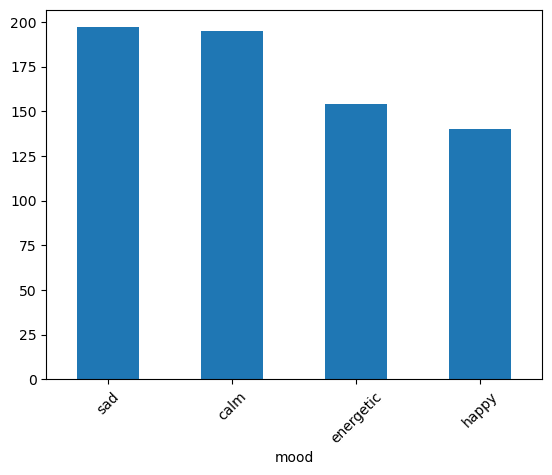

In [51]:
df['mood'].value_counts().plot(kind='bar',rot=45)

In [ ]:
!pip install streamlit tensorflow pillow pandas

In [75]:
!pip install streamlit pyngrok --quiet

In [ ]:
%%writefile app_flask.py
from flask import Flask, render_template_string, Response, request, redirect, url_for
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
from PIL import Image

# Load model and music data
model = load_model("mood_classifier_mobilenetv2.keras")
df = pd.read_csv(r"C:\Users\ASG\Downloads\Project\data_moods.csv")
df.drop_duplicates(subset=["name"], inplace=True)
df["mood"] = df["mood"].str.lower()

IMG_SIZE = 224
CLASS_LABELS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Flask app
app = Flask(__name__)
camera = cv2.VideoCapture(0)
captured_frame = None

HTML_TEMPLATE = """
<!DOCTYPE html>
<html>
<head>
    <title>Real-Time Mood Detection 🎥</title>
    <style>
        body { font-family: Arial; text-align: center; padding-top: 30px; background: #f4f4f4; }
        h1 { color: #2c3e50; }
        .video { margin-top: 20px; }
        button { background: #3498db; color: white; padding: 10px 20px; border: none; font-size: 1rem; border-radius: 8px; cursor: pointer; margin-top: 20px; }
        button:hover { background: #2980b9; }
        .mood { font-size: 1.4rem; color: #27ae60; margin-top: 30px; }
        ul { text-align: left; display: inline-block; margin-top: 20px; }
        li { background: #ecf0f1; padding: 10px; margin: 5px 0; border-radius: 8px; }
    </style>
</head>
<body>
    <h1>Real-Time Mood Detection & Music Recommender</h1>
    <div class="video">
        <img src="{{ url_for('video_feed') }}" width="640" height="480">
    </div>
    <form method="POST" action="/capture">
        <button type="submit">Capture Mood</button>
    </form>
    {% if mood %}
        <div class="mood">Detected Mood: {{ mood.capitalize() }}</div>
        <h3>Recommended Songs:</h3>
        <ul>
        {% for song in songs %}
            <li><b>{{ song.name }}</b><br><i>{{ song.artist }}</i> | Album: {{ song.album }} | Popularity: {{ song.popularity }}</li>
        {% endfor %}
        </ul>
    {% endif %}
</body>
</html>
"""

def gen_frames():
    global captured_frame
    while True:
        success, frame = camera.read()
        if not success:
            break
        else:
            captured_frame = frame
            ret, buffer = cv2.imencode('.jpg', frame)
            frame_bytes = buffer.tobytes()
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame_bytes + b'\r\n')

def predict_mood_from_frame(frame):
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_index = np.argmax(prediction)
    return CLASS_LABELS[predicted_index]

def recommend_songs_by_mood(mood, top_n=5):
    mood = mood.lower()
    mood_songs = df[df['mood'] == mood]
    if mood_songs.empty:
        return []
    return mood_songs.sort_values(by=['popularity', 'valence'], ascending=False).head(top_n).to_dict(orient='records')

@app.route('/', methods=['GET'])
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/video_feed')
def video_feed():
    return Response(gen_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

@app.route('/capture', methods=['POST'])
def capture():
    global captured_frame
    mood = predict_mood_from_frame(captured_frame)
    songs = recommend_songs_by_mood(mood)
    return render_template_string(HTML_TEMPLATE, mood=mood, songs=songs)

if __name__ == '__main__':
    app.run(port=5000)


In [ ]:
!python app_flask.py 

In [ ]:
from pyngrok import ngrok
ngrok.kill()

public_url = ngrok.connect(5000)
print(f"🌐 Your Flask app is running at: {public_url}")